In [2]:
# module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats # Probability Distribution Graphs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read train data
train = pd.read_csv('./../train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.shape

(10886, 12)

In [5]:
# Read test data
test = pd.read_csv('./../test.csv', parse_dates=['datetime']) # Date the datetime column.
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.shape

(6493, 9)

In [7]:
# set train feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape)
print(train.info())

(10886, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB
None


In [8]:
# set test feature
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
print(test.shape)
print(test.info())

(6493, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
year          6493 non-null int64
month         6493 non-null int64
day           6493 non-null int64
hour          6493 non-null int64
minute        6493 non-null int64
second        6493 non-null int64
dayofweek     6493 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 811.7 KB
None


In [9]:
# Use RandomForest to replace zero value
def predict_windspeed(data):
    # Separating windspeed from zero and non-zero.
    dataWind0 = data[data['windspeed'] == 0]
    dataWindN0 = data[data['windspeed'] != 0]
    # Choose Feature
    fcol = ['season','weather','humidity','month','temp','year','atemp']
    
    # Change the wind speed value to character to use RandomForest Classification
    dataWindN0['windspeed'] = dataWindN0['windspeed'].astype('str')
    
    # RandomForest
    rfModelWind = RandomForestClassifier()
    
    # train from items in fcol
    rfModelWind.fit(dataWindN0[fcol], dataWindN0['windspeed'])
    
    # Prediction of data with 0 windspeed
    wind0Values = rfModelWind.predict(X = dataWind0[fcol])
    
    # Create dataframe to use after prediction
    predictWind0 = dataWind0
    predictWindN0 = dataWindN0
    
    # Prediction Substitution
    predictWind0['windspeed'] = wind0Values
    
    # merge data
    data = predictWindN0.append(predictWind0)
    
    # Convert windspeed's type to float
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

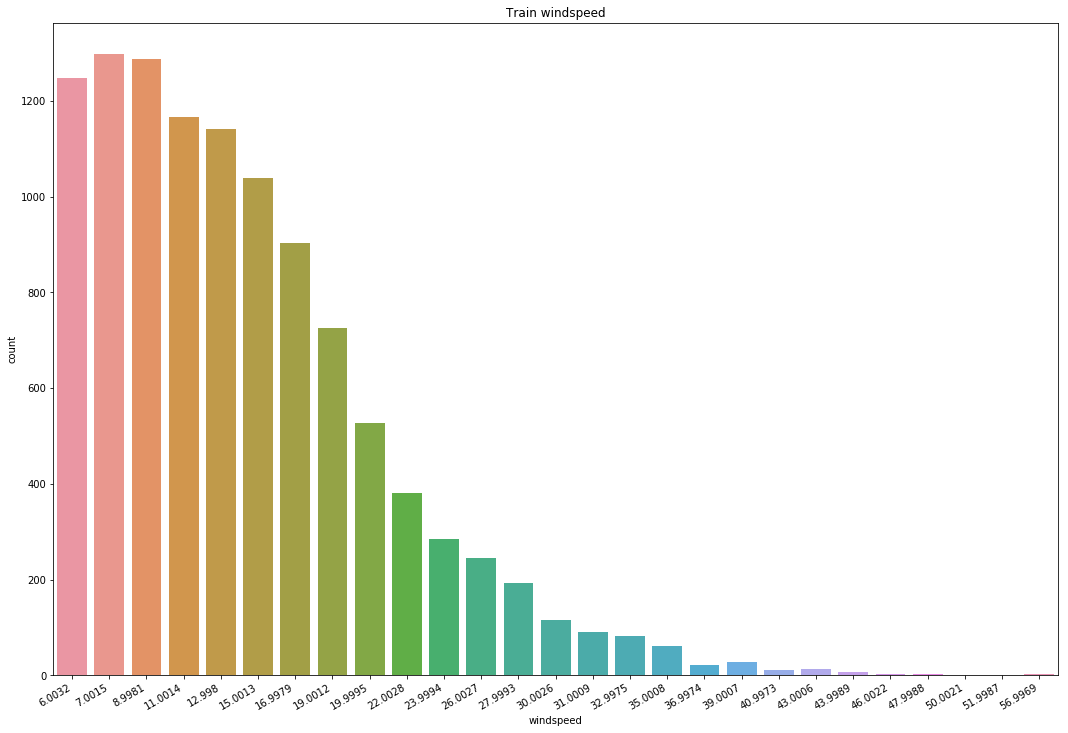

In [10]:
# # Replace the train dataset with windspeed of 0 with RandomForestClassifier.
train = predict_windspeed(train)

# Check train dataset
fig, ax1 = plt.subplots()
fig.set_size_inches(18,12)

plt.sca(ax1)
plt.xticks(rotation=30, ha = 'right') # ha is base
ax1.set(ylabel='Count', title='Train windspeed')
sns.countplot(data=train, x='windspeed',ax=ax1)

# Windspeed shows a lot of 0 values.

In [11]:
# Distinguish between continuous and categorical features
# Continuous Feature : temp, humidity, windspeed, atemp
# Categorical Feature : season, holiday, workingday, weather, dayofweek, month, year, hour
# Change categorical feature to category
categorical_feature_name = ['season','holiday','workingday','weather','dayofweek','month','year','hour']

for i in categorical_feature_name:
    train[i] = train[i].astype('category')

In [12]:
# Configure required features
feature_name = ['season','weather','temp','atemp','humidity','windspeed','year','hour','dayofweek','holiday','workingday']

In [13]:
X_train = train[feature_name]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [14]:
X_test = test[feature_name]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [15]:
Y_train = (train['count'])
print(Y_train.shape)
Y_train.head()
    # classified answers

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [16]:
# n_estimator / n_jobs = -1 do it until you know the answer
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0) 
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
# Training
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
# Prediction
pre = model.predict(X_test)
print(pre.shape)
pre[0:10]

(6493,)


array([ 12.09,   5.21,   4.25,   3.43,   3.14,   6.26,  38.02, 104.47,
       236.86, 136.73])

[Text(0.5, 1.0, 'Test')]

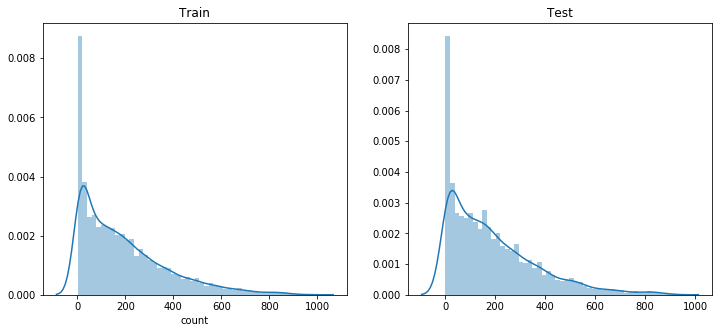

In [19]:
# Visualize predicted data
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train, ax=ax1, bins=50)
ax1.set(title='Train')
sns.distplot(pre, ax=ax2, bins=50)
ax2.set(title='Test')
    # It's okay because the train data and test data look similar

In [20]:
submission = pd.read_csv('./sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [21]:
submission['count'] = pre
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.09
1,2011-01-20 01:00:00,5.21
2,2011-01-20 02:00:00,4.25
3,2011-01-20 03:00:00,3.43
4,2011-01-20 04:00:00,3.14


In [22]:
submission.to_csv('./score-1.csv', index=False)

In [23]:
0.41879

0.41879

In [24]:
429/3251

0.13195939710858198

- RandomForest predicts windspeed of 0 in train
- Change Categorical Feature to Category
- feature_name = ['season','weather','temp','atemp','humidity','windspeed','year','hour','dayofweek','holiday','workingday']
- RandomForestRegressor prediction
- Top 13.5%